This notebook contains maps of model outputs vs true outcomes. See `census_precinct_data.ipynb` for maps of input features.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [11]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')
vtds = vtds.dissolve(by="GEOID20").reset_index()  # combine VTD areas that have same name
vtds = vtds.rename(columns={"GEOID20":"VTD_ID"})  # rename identifying column for simplicity
vtds["VTD_ID"] = vtds.VTD_ID.astype(str)  # convert to string
vtds = vtds[["VTD_ID","geometry"]]
vtds

,VTD_ID,geometry
0,26001001001,"POLYGON ((-83.64576 44.77049, -83.64541 44.771..."
1,26001001002,"POLYGON ((-83.76779 44.77279, -83.76777 44.774..."
2,26001001003,"POLYGON ((-83.88742 44.59538, -83.88665 44.595..."
3,26001001004,"POLYGON ((-83.40228 44.59806, -83.40025 44.598..."
4,26001001005,"POLYGON ((-83.52528 44.68394, -83.52456 44.684..."
...,...,...
4800,26165165017,"POLYGON ((-85.58029 44.33749, -85.58027 44.338..."
4801,26165165018,"POLYGON ((-85.82127 44.27858, -85.82121 44.280..."
4802,26165165019,"POLYGON ((-85.82145 44.22325, -85.82137 44.228..."
4803,26165165020,"POLYGON ((-85.82086 44.35248, -85.82082 44.360..."


In [3]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

def simple_choropleth(data,variable,title=None):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # (for example, for community_areas but not for tracts)
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        data.plot(column=variable,legend=True)
        if title is None:
            title = variable
        plt.title(title)
        plt.show()

In [12]:
data = pd.read_csv('data/mi_matched_precinct_use_this.csv')
data["VTD_ID"] = data.VTD_ID.astype(str)  # convert to string
data

,VTD_ID,total_pop,pop_density,prop_white,prop_Black,prop_Hispanic,prop_AIA,prop_Asian,prop_married,prop_nonfamily,...,prop_some_college,prop_bachelors,prop_higher,prop_under_hs,prop_under_30k,prop_30_to_50k,prop_50_to_100k,prop_more_than_100k,D_pct_vote,Weighted_ideology
0,26063063011,129.536026,0.000005,0.970255,0.000000,0.012748,0.016997,0.000000,0.588889,0.369444,...,0.158678,0.090909,0.084298,0.666116,0.344444,0.247222,0.266667,0.141667,0.228571,-0.078343
1,26063063015,460.331798,0.000016,0.970038,0.000000,0.013012,0.016950,0.000000,0.587382,0.370388,...,0.158594,0.091005,0.084258,0.666143,0.344266,0.246589,0.267258,0.141887,0.215116,0.157657
2,26063063021,656.081894,0.000013,0.987864,0.000000,0.007282,0.004854,0.000000,0.696721,0.237705,...,0.137584,0.097315,0.033557,0.731544,0.209016,0.178279,0.461066,0.151639,0.183246,-0.031272
3,26063063027,634.000000,0.000007,0.973186,0.000000,0.017350,0.009464,0.000000,0.553719,0.309917,...,0.099291,0.078014,0.021277,0.801418,0.227273,0.285124,0.347107,0.140496,0.224409,-0.142366
4,26099099208,1067.006633,0.001649,0.929709,0.003749,0.001875,0.000000,0.031865,0.710213,0.247031,...,0.152117,0.250000,0.186507,0.411376,0.168646,0.114014,0.315915,0.401425,0.344262,-0.132125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,26163163816,2254.373896,0.000600,0.782618,0.038776,0.058316,0.017743,0.102547,0.667799,0.269621,...,0.099239,0.299268,0.308993,0.280310,0.099188,0.132524,0.232912,0.535376,0.483419,-0.155371
246,26163163817,2412.939006,0.000807,0.858341,0.020712,0.026011,0.020645,0.079797,0.541736,0.281159,...,0.157408,0.260273,0.212850,0.369469,0.165269,0.170149,0.302305,0.362277,0.498650,-0.198097
247,26163163818,2638.708464,0.001235,0.828207,0.003732,0.052125,0.003860,0.113106,0.753307,0.184240,...,0.119984,0.335917,0.360532,0.183567,0.082955,0.070514,0.273983,0.572548,0.421380,-0.004332
248,26163163819,2455.000000,0.000655,0.907536,0.026884,0.000000,0.000000,0.065580,0.847747,0.126675,...,0.057533,0.276987,0.424674,0.240807,0.000000,0.096224,0.160780,0.742996,0.424718,-0.011036


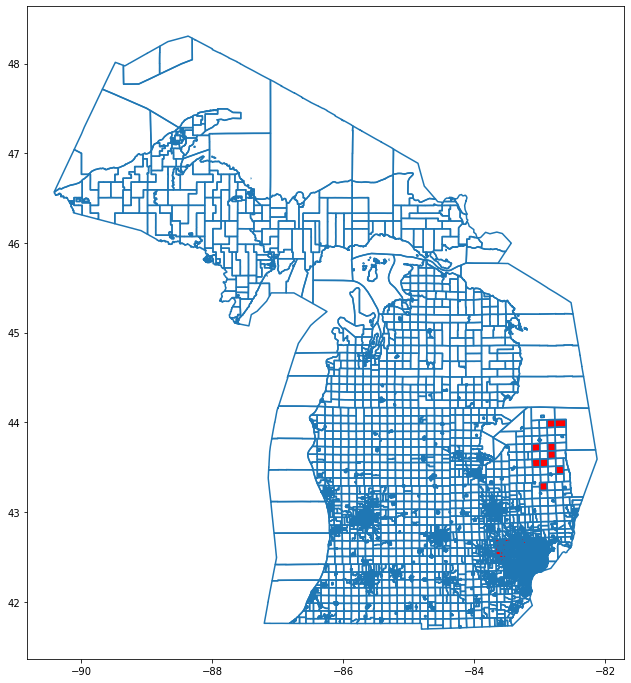

In [16]:
fig, ax = plt.subplots()
vtds.boundary.plot(ax=ax)
pd.merge(vtds,data,on='VTD_ID').plot(color='red',ax=ax)
plt.show()